# Glass Type Prediction

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
df=pd.read_csv('glass.csv')

In [3]:
df.head(10)

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type
0,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.0,0.00,1
1,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.0,0.00,1
2,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.0,0.00,1
3,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.0,0.00,1
4,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.0,0.00,1
5,1.51596,12.79,3.61,1.62,72.97,0.64,8.07,0.0,0.26,1
6,1.51743,13.30,3.60,1.14,73.09,0.58,8.17,0.0,0.00,1
7,1.51756,13.15,3.61,1.05,73.24,0.57,8.24,0.0,0.00,1
8,1.51918,14.04,3.58,1.37,72.08,0.56,8.30,0.0,0.00,1
9,1.51755,13.00,3.60,1.36,72.99,0.57,8.40,0.0,0.11,1


# EDA

In [4]:
df.columns

Index(['RI', 'Na', 'Mg', 'Al', 'Si', 'K', 'Ca', 'Ba', 'Fe', 'Type'], dtype='object')

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 214 entries, 0 to 213
Data columns (total 10 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   RI      214 non-null    float64
 1   Na      214 non-null    float64
 2   Mg      214 non-null    float64
 3   Al      214 non-null    float64
 4   Si      214 non-null    float64
 5   K       214 non-null    float64
 6   Ca      214 non-null    float64
 7   Ba      214 non-null    float64
 8   Fe      214 non-null    float64
 9   Type    214 non-null    int64  
dtypes: float64(9), int64(1)
memory usage: 16.8 KB


In [6]:
df.isnull().sum()

RI      0
Na      0
Mg      0
Al      0
Si      0
K       0
Ca      0
Ba      0
Fe      0
Type    0
dtype: int64

In [7]:
df.describe()

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type
count,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000
mean,1.518365,13.407850,2.684533,1.444907,72.650935,0.497056,8.956963,0.175047,0.057009,2.780374
std,0.003037,0.816604,1.442408,0.499270,0.774546,0.652192,1.423153,0.497219,0.097439,2.103739
min,1.511150,10.730000,0.000000,0.290000,69.810000,0.000000,5.430000,0.000000,0.000000,1.000000
25%,1.516522,12.907500,2.115000,1.190000,72.280000,0.122500,8.240000,0.000000,0.000000,1.000000
50%,1.517680,13.300000,3.480000,1.360000,72.790000,0.555000,8.600000,0.000000,0.000000,2.000000
75%,1.519157,13.825000,3.600000,1.630000,73.087500,0.610000,9.172500,0.000000,0.100000,3.000000
max,1.533930,17.380000,4.490000,3.500000,75.410000,6.210000,16.190000,3.150000,0.510000,7.000000


# Visualization

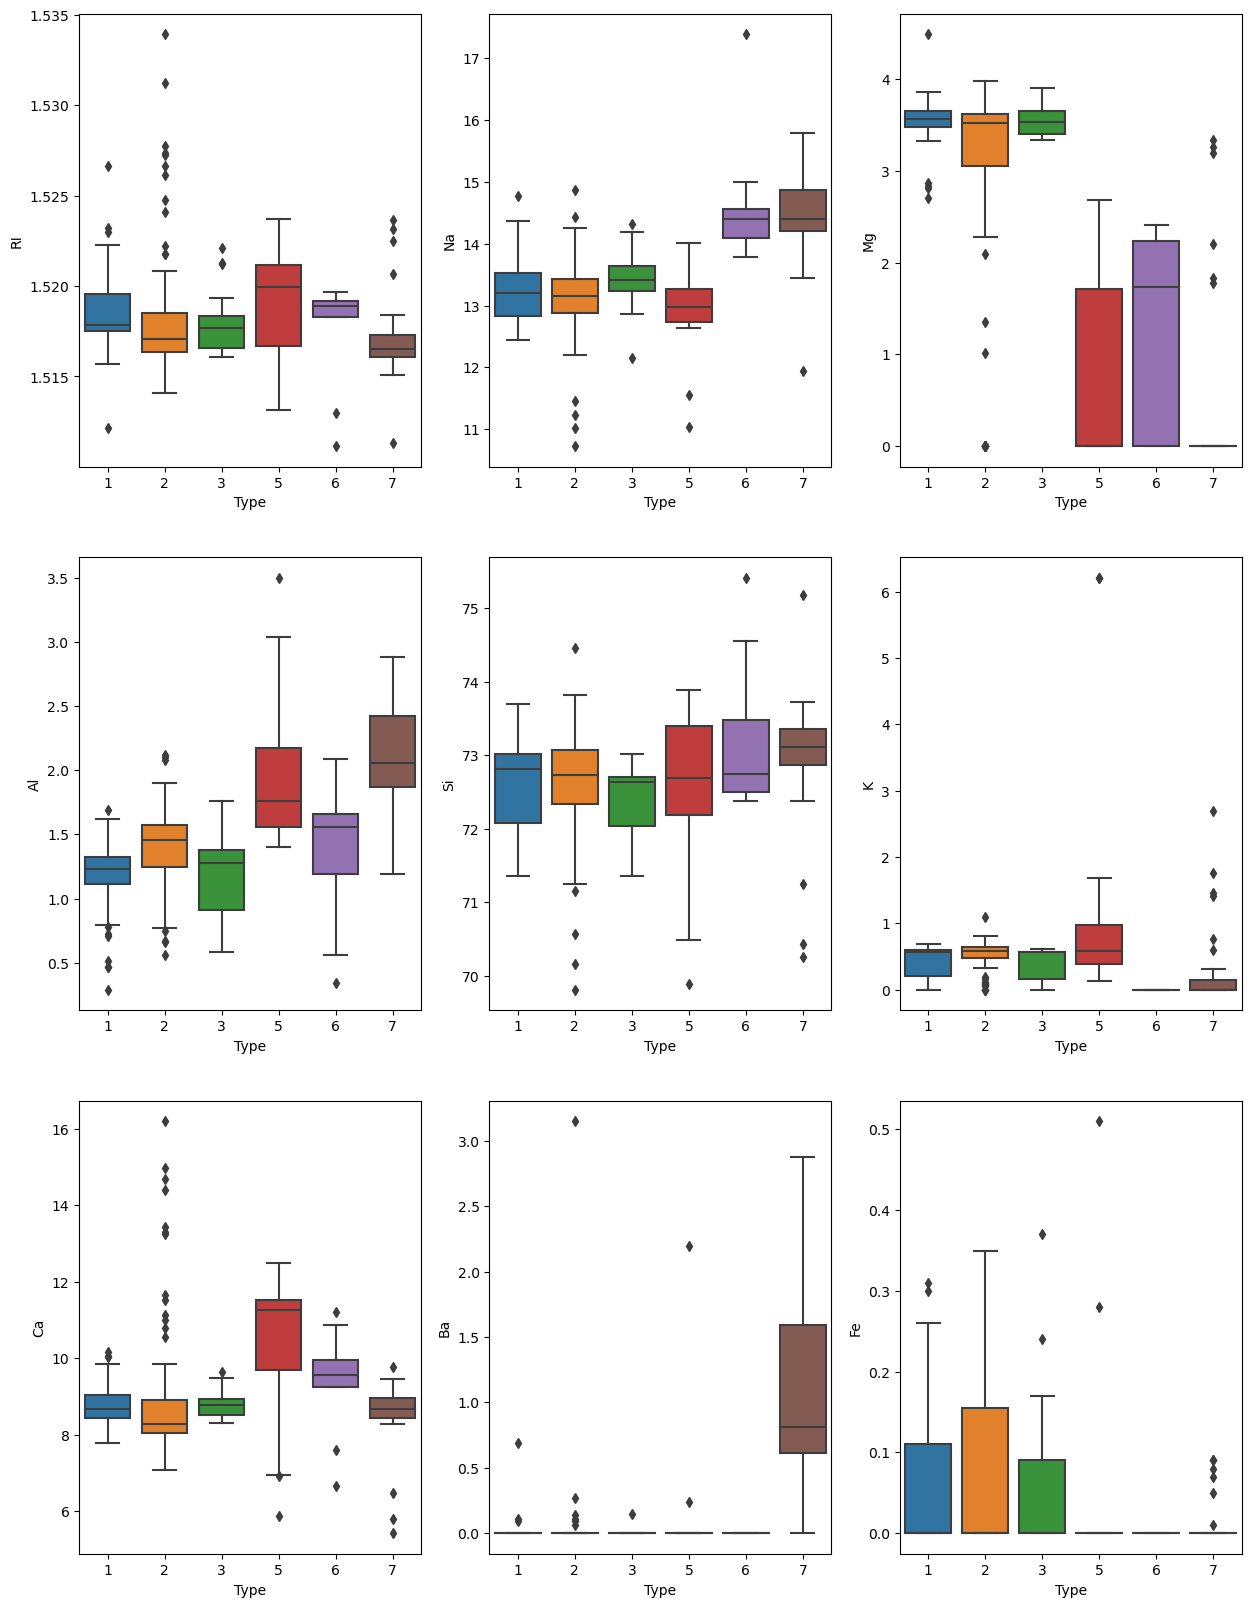

In [8]:
plt.figure(figsize=(15,20))
plt.subplot(3,3,1)
sns.boxplot(x='Type', y='RI', data=df)
plt.subplot(3,3,2)
sns.boxplot(x='Type', y='Na', data=df)
plt.subplot(3,3,3)
sns.boxplot(x='Type', y='Mg', data=df)
plt.subplot(3,3,4)
sns.boxplot(x='Type', y='Al', data=df)
plt.subplot(3,3,5)
sns.boxplot(x='Type', y='Si', data=df)
plt.subplot(3,3,6)
sns.boxplot(x='Type', y='K', data=df)
plt.subplot(3,3,7)
sns.boxplot(x='Type', y='Ca', data=df)
plt.subplot(3,3,8)
sns.boxplot(x='Type', y='Ba', data=df)
plt.subplot(3,3,9)
sns.boxplot(x='Type', y='Fe', data=df)
plt.show()

In [9]:
df['Type'].value_counts()

2    76
1    70
7    29
3    17
5    13
6     9
Name: Type, dtype: int64

<Axes: xlabel='Type', ylabel='count'>

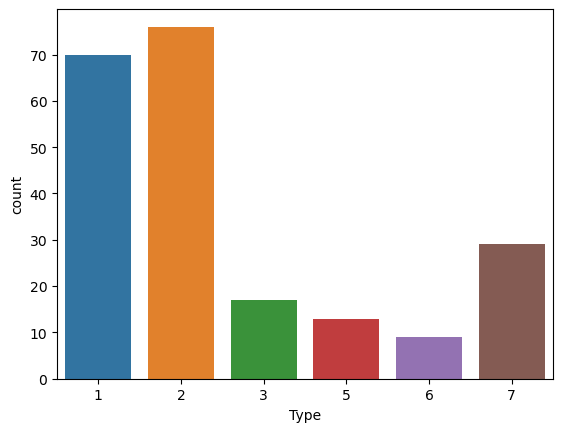

In [35]:
sns.countplot(x='Type',data=df)

In [36]:
cor=df.corr()

<Axes: >

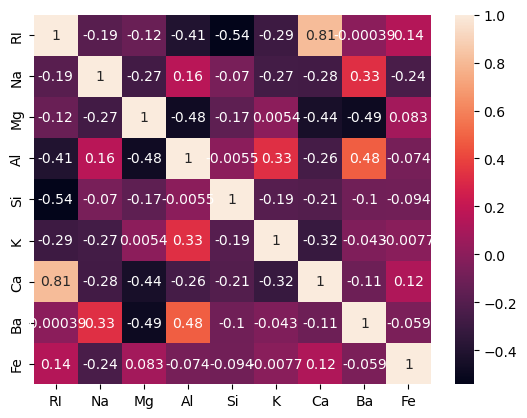

In [37]:
sns.heatmap(cor.iloc[:9,:9],annot=True)

# Splitting the data

In [38]:
x=df.iloc[:,:-1]
y=df.iloc[:,-1]

In [39]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report, accuracy_score

In [40]:
xtrain,xtest,ytrain,ytest=train_test_split(x,y,test_size=.2,random_state=42)

In [41]:
print(xtrain.shape)
print(xtest.shape)
print(ytrain.shape)
print(ytest.shape)

(171, 9)
(43, 9)
(171,)
(43,)


In [42]:
np.unique(ytest)

array([1, 2, 3, 5, 6, 7], dtype=int64)

# Using different type of classification algorithms

In [43]:
sv=SVC()
dtc= DecisionTreeClassifier()
rc= RandomForestClassifier()
knn= KNeighborsClassifier()
gbc=GradientBoostingClassifier()
model=[sv,dtc,rc,knn,gbc]



for m in model:
    m.fit(xtrain,ytrain)
    m.score(xtrain,ytrain)
    pred=m.predict(xtest)
    
    print('Accuracy score :', m)
    print(accuracy_score(ytest,pred))   
    print(confusion_matrix(ytest,pred)) 
    print(classification_report(ytest,pred))   

Accuracy score : SVC()
0.32558139534883723
[[ 0 11  0  0  0  0]
 [ 0 14  0  0  0  0]
 [ 0  3  0  0  0  0]
 [ 0  4  0  0  0  0]
 [ 0  3  0  0  0  0]
 [ 0  8  0  0  0  0]]
              precision    recall  f1-score   support

           1       0.00      0.00      0.00        11
           2       0.33      1.00      0.49        14
           3       0.00      0.00      0.00         3
           5       0.00      0.00      0.00         4
           6       0.00      0.00      0.00         3
           7       0.00      0.00      0.00         8

    accuracy                           0.33        43
   macro avg       0.05      0.17      0.08        43
weighted avg       0.11      0.33      0.16        43

Accuracy score : DecisionTreeClassifier()
0.8372093023255814
[[10  0  0  0  0  1]
 [ 4  9  1  0  0  0]
 [ 0  0  3  0  0  0]
 [ 0  1  0  3  0  0]
 [ 0  0  0  0  3  0]
 [ 0  0  0  0  0  8]]
              precision    recall  f1-score   support

           1       0.71      0.91      0.80 

# Hyperparameter tuning

In [46]:
param = { "criterion" : ["gini", "entropy"], "n_estimators": [100, 125, 200]}
grid = GridSearchCV( rc,param)
grid.fit(xtrain, ytrain)
print("Best parameters set are:")
print(grid.best_params_)

Best parameters set are:
{'criterion': 'gini', 'n_estimators': 100}


# Final Model

In [47]:
model = grid.best_estimator_
model.fit(xtrain,ytrain)
y_pred = model.predict(xtest)
print(accuracy_score(y_pred,ytest))

0.8604651162790697


# Predictive system

In [50]:
t=np.array([1.51743,13.30,3.60,1.14,73.09,0.58,8.17,0.0,0.00])
t=t.reshape(1,-1)
model.predict(t)


array([1], dtype=int64)